In [1]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

plt.rcParams['text.usetex'] = True

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

# Example usage of some constants
print(f"Permittivity of free space: {epsilon_0} F/m")
print(f"Permeability of free space: {mu_0} N/A^2")
print(f"Speed of light in vacuum: {c} m/s")
# print(f"Elementary charge: {e} C")
# print(f"Planck constant: {h} J·s")
# print(f"Reduced Planck constant: {hbar} J·s")
print(f"Boltzmann constant: {k} J/K")
# print(f"Newtonian constant of gravitation: {G} m^3/kg/s^2")
# print(f"Electron mass: {m_e} kg")
# print(f"Proton mass: {m_p} kg")
# print(f"Neutron mass: {m_n} kg")
# print(f"Fine-structure constant: {alpha}")
print(f"Electron volt: {eV} J")

def print_engineering_notation(value):
    """
    Print a value in engineering notation (powers of ten in multiples of 3).

    Parameters:
    value (float): The value to be printed in engineering notation.
    """
    
    if value == 0:
        print("0")
        return

    exponent = int(math.floor(math.log10(abs(value)) / 3) * 3)
    mantissa = value / (10 ** exponent)
    
    print(f"{mantissa:.3f}e{exponent}")

# Example usage
print_engineering_notation(0)          # Output: 0
print_engineering_notation(1234.56)    # Output: 1.235e3
print_engineering_notation(0.00123456) # Output: 1.235e-3
print_engineering_notation(-987654)    # Output: -987.654e3
print_engineering_notation(1e9)        # Output: 1.000e9


Permittivity of free space: 8.8541878128e-12 F/m
Permeability of free space: 1.25663706212e-06 N/A^2
Speed of light in vacuum: 299792458.0 m/s
Boltzmann constant: 1.380649e-23 J/K
Electron volt: 1.602176634e-19 J
0
1.235e3
1.235e-3
-987.654e3
1.000e9


In [2]:
rho_salt0_df = pd.read_csv('cryosphere_model porosity0p1rho_salt0.csv')
rho_salt1eN5_df = pd.read_csv('cryosphere_model porosity0p1rho_salt1e-5.csv')
rho_salt1eN3_df = pd.read_csv('cryosphere_model porosity0p1rho_salt1e-3.csv')
rho_salt4p2eN2_df = pd.read_csv('cryosphere_model porosity0p1rho_salt4.2e-2.csv')

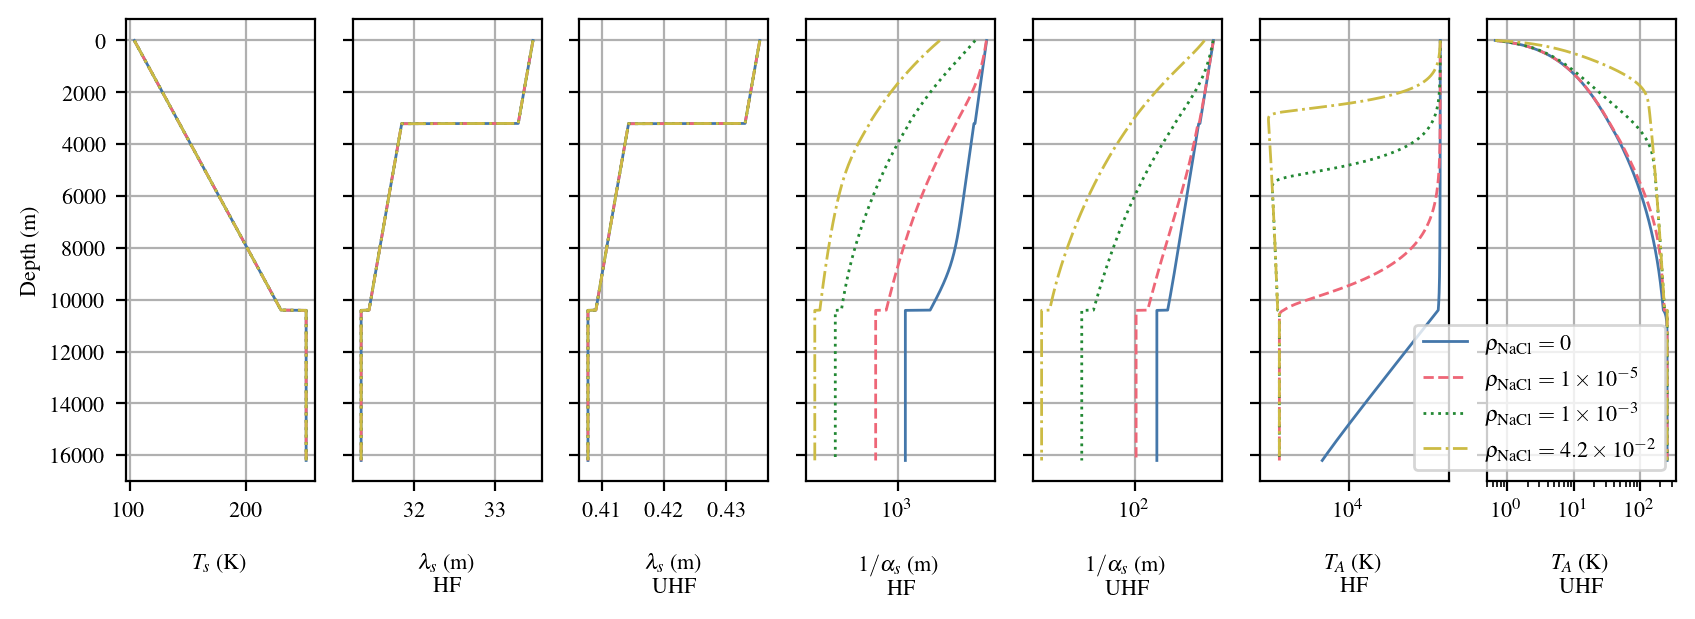

In [5]:
number_of_plots = 7
low_band_f = 5.373e6
high_band_f = 413e6

fig, axs = plt.subplots(1, number_of_plots, figsize=(10, 3)) #, gridspec_kw={'wspace': 0}

# Plot ice temperature,  
# penetration depth (include a penetration depth of sea water, and terrestrial sea ice), 
# wavelength, T_A, puck placements
rho_salt_list_of_dfs = [rho_salt0_df, rho_salt1eN5_df, rho_salt1eN3_df, rho_salt4p2eN2_df]
rho_salt_legend_names = [r'$\rho_{\rm{NaCl}}=0$', r'$\rho_{\rm{NaCl}}=1\times10^{-5}$', r'$\rho_{\rm{NaCl}}=1\times10^{-3}$', r'$\rho_{\rm{NaCl}}=4.2\times10^{-2}$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    label = rho_salt_legend_names[i]
    axs[0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    axs[1].plot(c / (low_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    axs[2].plot(c / (high_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    axs[3].plot(1 / df['alpha_s low band'], df['Depth (m)'], label=label)
    axs[4].plot(1 / df['alpha_s high band'], df['Depth (m)'], label=label)
    axs[5].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], label=label)
    axs[6].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], label=label)

axs[0].set_xlabel('$T_s$ (K)', labelpad=12)
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()

# wavelength
axs[1].set_xlabel(r'$\lambda_s$ (m)' "\n" r'$\rm{HF}$', labelpad=12)

# wavelength
axs[2].set_xlabel(r'$\lambda_s$ (m)' "\n" r'$\rm{UHF}$', labelpad=12)

# penetration depth (include a penetration depth of sea water, and terrestrial sea ice)
axs[3].set_xlabel(r'$1/\alpha_s$ (m)' "\n" r'$\rm{HF}$', labelpad=12)
axs[3].set_xscale('log')

axs[4].set_xlabel(r'$1/\alpha_s$ (m)' "\n" r'$\rm{UHF}$', labelpad=12)
axs[4].set_xscale('log')

# T_A
axs[5].set_xlabel('$T_A$ (K)' "\n" r'$\rm{HF}$', labelpad=12)
axs[5].set_xscale('log')

axs[6].set_xlabel('$T_A$ (K)' "\n" r'$\rm{UHF}$', labelpad=12)
axs[6].set_xscale('log')
axs[6].legend()


for i in np.arange(number_of_plots):
    axs[i].grid(True)
    if i != 0:
        axs[i].invert_yaxis()
        axs[i].set_yticklabels([])


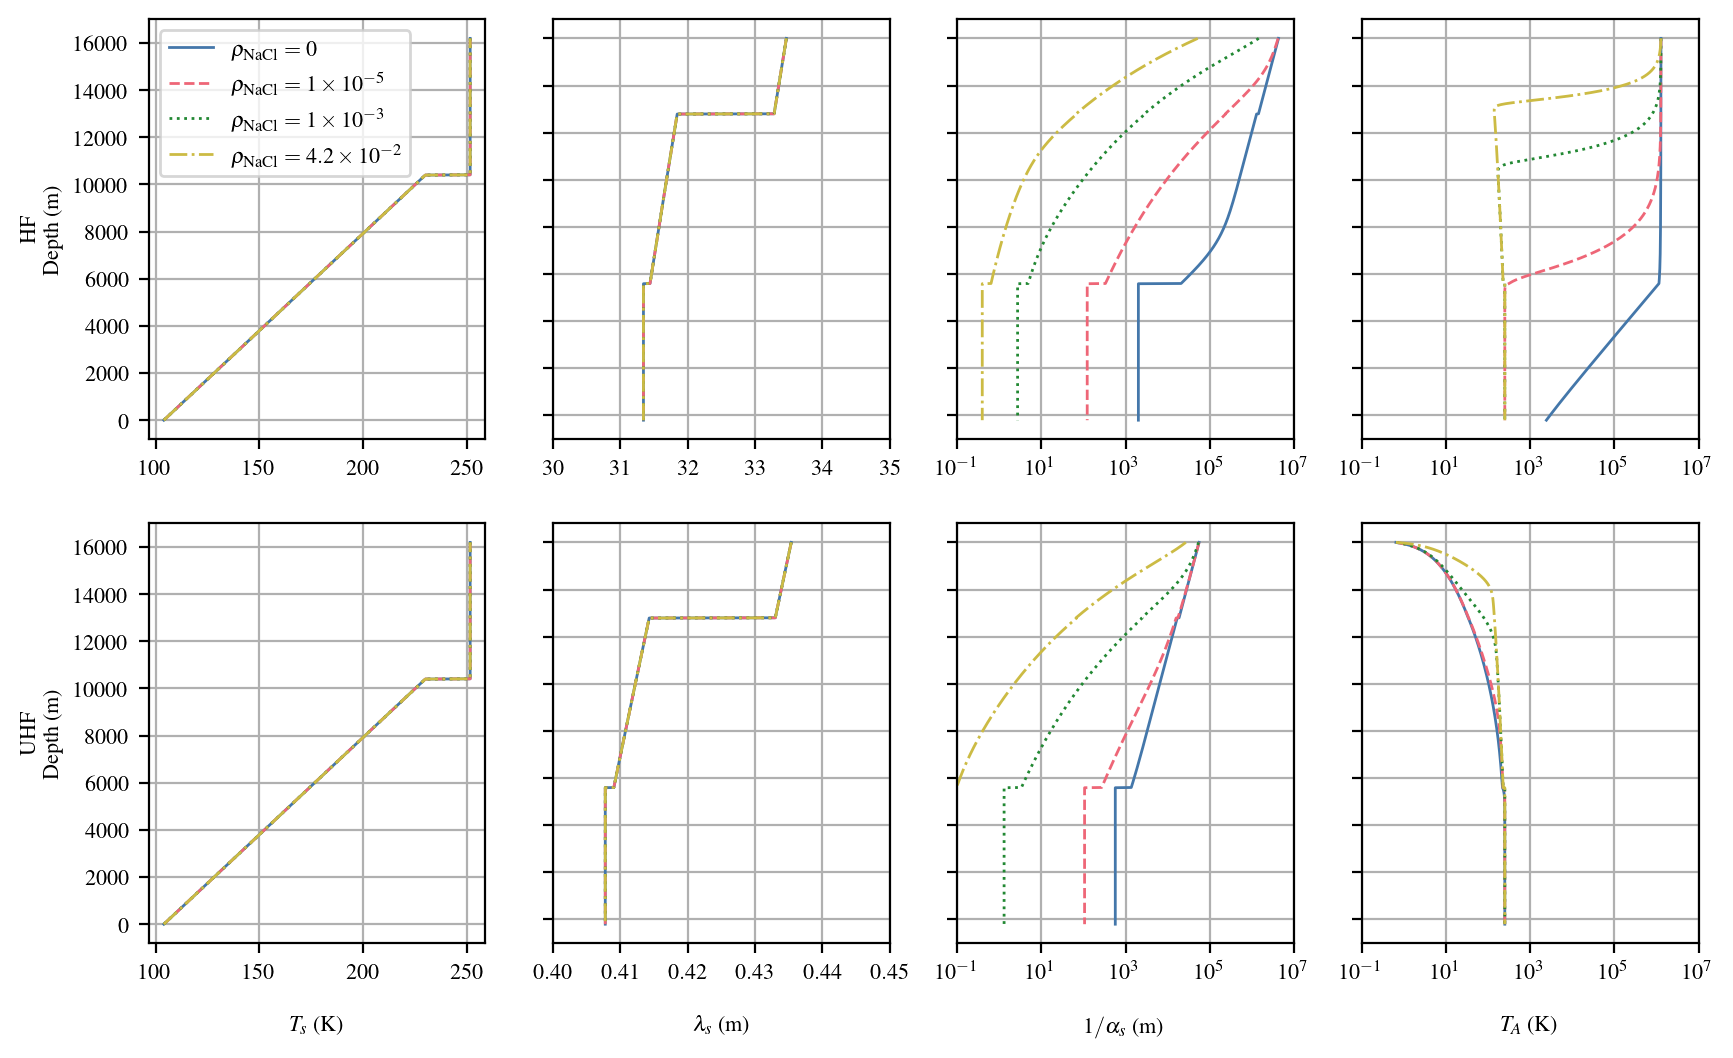

In [25]:
from matplotlib.gridspec import GridSpec

number_of_plots = 8
low_band_f = 5.373e6
high_band_f = 413e6

fig, ax = plt.subplots(2, 4, figsize=(10, 6)) #, gridspec_kw={'wspace': 0}
gs = GridSpec(1, 2, width_ratios=[1, 2], wspace=0)  # First plot is half the width of the second

axs = ax.flatten()

# Plot ice temperature,  
# penetration depth (include a penetration depth of sea water, and terrestrial sea ice), 
# wavelength, T_A, puck placements
rho_salt_list_of_dfs = [rho_salt0_df, rho_salt1eN5_df, rho_salt1eN3_df, rho_salt4p2eN2_df]
rho_salt_legend_names = [r'$\rho_{\rm{NaCl}}=0$', r'$\rho_{\rm{NaCl}}=1\times10^{-5}$', r'$\rho_{\rm{NaCl}}=1\times10^{-3}$', r'$\rho_{\rm{NaCl}}=4.2\times10^{-2}$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    label = rho_salt_legend_names[i]
    # Temperature
    ax[0, 0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    ax[0, 0].set_ylabel('HF' '\n' 'Depth (m)')
    ax[0, 0].invert_yaxis()
    
    ax[1, 0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    ax[1, 0].set_xlabel('$T_s$ (K)', labelpad=12)
    ax[1, 0].set_ylabel('UHF' '\n' 'Depth (m)')
    ax[1, 0].invert_yaxis()

    # Wavelength
    ax[0, 1].plot(c / (low_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[0, 1].set_xlim(30, 35)
    ax[1, 1].plot(c / (high_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[1, 1].set_xlabel(r'$\lambda_s$ (m)', labelpad=12)
    ax[1, 1].set_xlim(0.4, 0.45)

    # Penetration Depth
    ax[0, 2].plot(1 / df['alpha_s low band'], df['Depth (m)'], label=label)
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xlim(10**-1, 10**7)

    ax[1, 2].plot(1 / df['alpha_s high band'], df['Depth (m)'], label=label)
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xlabel(r'$1/\alpha_s$ (m)', labelpad=12)
    ax[1, 2].set_xlim(10**-1, 10**7)

    # T A 
    ax[0, 3].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], label=label)
    ax[0, 3].set_xscale('log')
    ax[0, 3].set_xlim(10**-1, 10**7)

    ax[1, 3].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], label=label)
    ax[1, 3].set_xlabel('$T_A$ (K)', labelpad=12)
    ax[1, 3].set_xscale('log')
    ax[1, 3].set_xlim(10**-1, 10**7)

axs[0].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    if i != 0 and i != 4:
        axs[i].invert_yaxis()
        axs[i].set_yticklabels([])

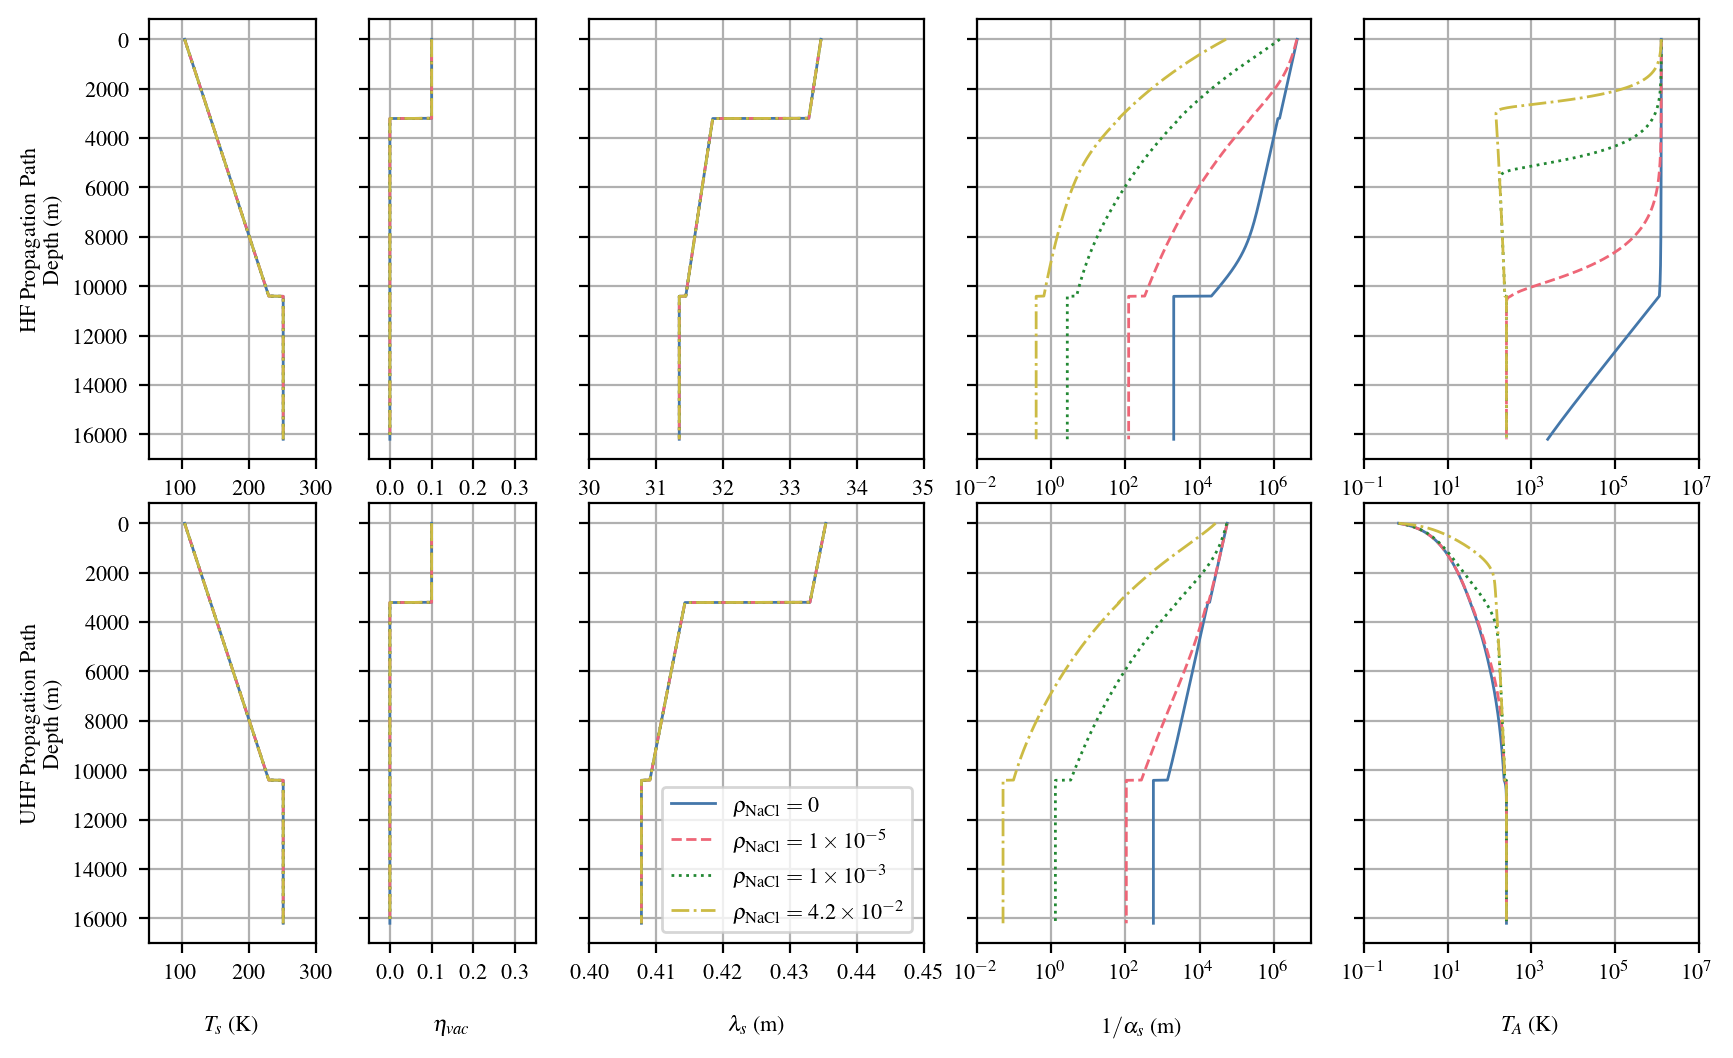

In [43]:
from matplotlib.gridspec import GridSpec

number_of_plots = 10
low_band_f = 5.373e6
high_band_f = 413e6

fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 5, width_ratios=[1, 1, 2, 2, 2], wspace=0.2, hspace=0.1)

# Define the positions in GridSpec
positions = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4),
    (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)
]

axs = []
for pos in positions:
    temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
    axs.append(temp_ax)

axs = np.array(axs)
ax = np.reshape(axs, (2, 5))

# Plot ice temperature,  
# penetration depth (include a penetration depth of sea water, and terrestrial sea ice), 
# wavelength, T_A, puck placements
rho_salt_list_of_dfs = [rho_salt0_df, rho_salt1eN5_df, rho_salt1eN3_df, rho_salt4p2eN2_df]
rho_salt_legend_names = [r'$\rho_{\rm{NaCl}}=0$', r'$\rho_{\rm{NaCl}}=1\times10^{-5}$', r'$\rho_{\rm{NaCl}}=1\times10^{-3}$', r'$\rho_{\rm{NaCl}}=4.2\times10^{-2}$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    label = rho_salt_legend_names[i]
    # Temperature
    ax[0, 0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    ax[0, 0].set_ylabel('HF Propagation Path' '\n' 'Depth (m)')
    ax[0, 0].set_xlim(50, 300)
    ax[0, 0].set_xticks([100, 200, 300])
    
    ax[1, 0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    ax[1, 0].set_xlabel('$T_s$ (K)', labelpad=12)
    ax[1, 0].set_ylabel('UHF Propagation Path' '\n' 'Depth (m)')
    ax[1, 0].set_xlim(50, 300)
    ax[1, 0].set_xticks([100, 200, 300])

    # Porosity
    ax[0, 1].plot(df['Porosity (m^3/m^3)'], df['Depth (m)'], label=label)
    ax[0, 1].set_xlim(-0.05, 0.35)
    ax[0, 1].set_xticks([0.0, 0.1, 0.2, 0.3])
    
    ax[1, 1].plot(df['Porosity (m^3/m^3)'], df['Depth (m)'], label=label)
    ax[1, 1].set_xlim(-0.05, 0.35)
    ax[1, 1].set_xticks([0.0, 0.1, 0.2, 0.3])
    ax[1, 1].set_xlabel(r'$\eta_{vac}$', labelpad=12)

    # Wavelength
    ax[0, 2].plot(c / (low_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[0, 2].set_xlim(30, 35)

    ax[1, 2].plot(c / (high_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[1, 2].set_xlabel(r'$\lambda_s$ (m)', labelpad=12)
    ax[1, 2].set_xlim(0.4, 0.45)

    # Penetration Depth
    ax[0, 3].plot(1 / df['alpha_s low band'], df['Depth (m)'], label=label)
    ax[0, 3].set_xscale('log')
    ax[0, 3].set_xlim(10**-2, 10**7)

    ax[1, 3].plot(1 / df['alpha_s high band'], df['Depth (m)'], label=label)
    ax[1, 3].set_xscale('log')
    ax[1, 3].set_xlabel(r'$1/\alpha_s$ (m)', labelpad=12)
    ax[1, 3].set_xlim(10**-2, 10**7)

    # T A 
    ax[0, 4].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], label=label)
    ax[0, 4].set_xscale('log')
    ax[0, 4].set_xlim(10**-1, 10**7)

    ax[1, 4].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], label=label)
    ax[1, 4].set_xlabel('$T_A$ (K)', labelpad=12)
    ax[1, 4].set_xscale('log')
    ax[1, 4].set_xlim(10**-1, 10**7)

axs[7].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != 5:
        axs[i].set_yticklabels([])